In [207]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

In [208]:
df = pd.read_csv('data/titanic/train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [209]:
df.set_index('PassengerId', inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [210]:
df.fillna({'Age':df.Age.median()}, inplace=True)

In [211]:
df.drop(['Name','Ticket','Cabin','Embarked'], axis=1, inplace=True)
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833


In [212]:
df_d = pd.get_dummies(df)
df_d.drop(['Sex_male'], axis=1, inplace=True)
df_d.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female
PassengerId,,,,,,,
1,0,3,22.0,1,0,7.2500,0
2,1,1,38.0,1,0,71.2833,1
3,1,3,26.0,0,0,7.9250,1


In [213]:
X = df_d.iloc[:,1:]
y = df_d.iloc[:,0]
X.head(1)

,Pclass,Age,SibSp,Parch,Fare,Sex_female
PassengerId,,,,,,
1,3,22.0,1,0,7.25,0


In [214]:
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=4)

In [215]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

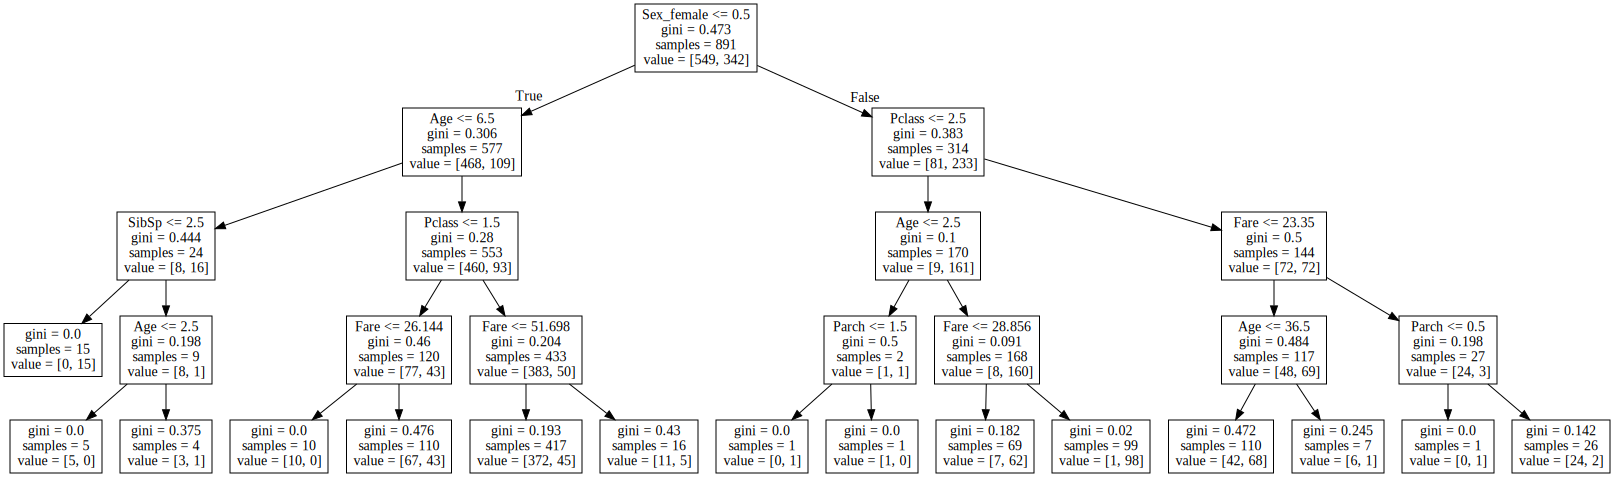

In [216]:
# хочу посмотреть, как он интерпретирует данные
graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=X.columns))
SVG(graph.pipe(format='svg'))

In [217]:
# теперь готовим данные к выгрузке
df_res = pd.read_csv('data/titanic/test.csv')
df_res.set_index('PassengerId', inplace=True)
df_res.fillna({'Age':df.Age.median(), 'Fare':df.Fare.mean()}, inplace=True)
df_res.drop(['Name','Ticket','Cabin','Embarked'], axis=1, inplace=True)
df_res = pd.get_dummies(df_res)
df_res.drop('Sex_male', axis=1, inplace=True)
df_res.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female
PassengerId,,,,,,
892,3,34.5,0,0,7.8292,0
893,3,47.0,1,0,7.0000,1
894,2,62.0,0,0,9.6875,0
895,3,27.0,0,0,8.6625,0
896,3,22.0,1,1,12.2875,1


In [218]:
df = pd.DataFrame({'Survived': clf.predict(df_res)}, index=df_res.index)

In [219]:
df.to_csv('data/titanic/result.csv')